<a href="https://colab.research.google.com/github/naidk/Internship-Portfolio/blob/main/Data-Science/Pima_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Initial Setup

In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

Step 2: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


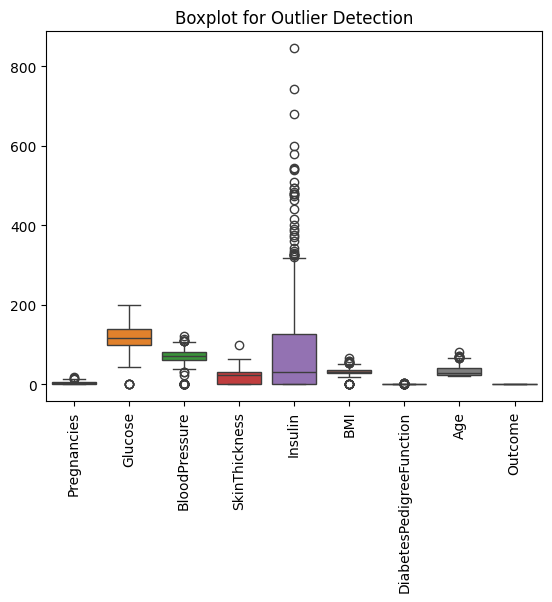

In [ ]:
df.describe()
df.info()
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


Step 2: Full EDA + Data Cleaning Tasks

🔹 Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

🔹 Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

🔹 Descriptive Stats:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          19.36          15.95   115.24   7.88   
min           0.

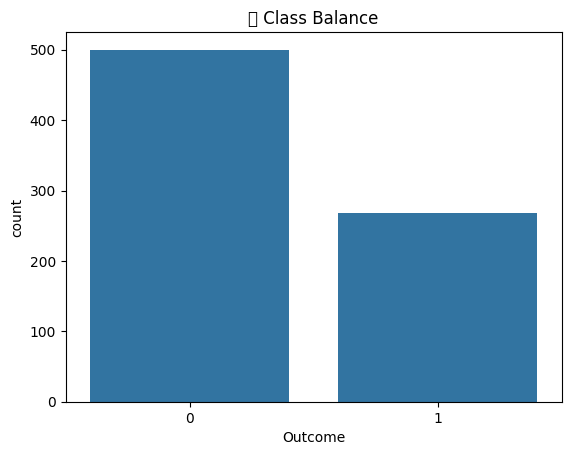

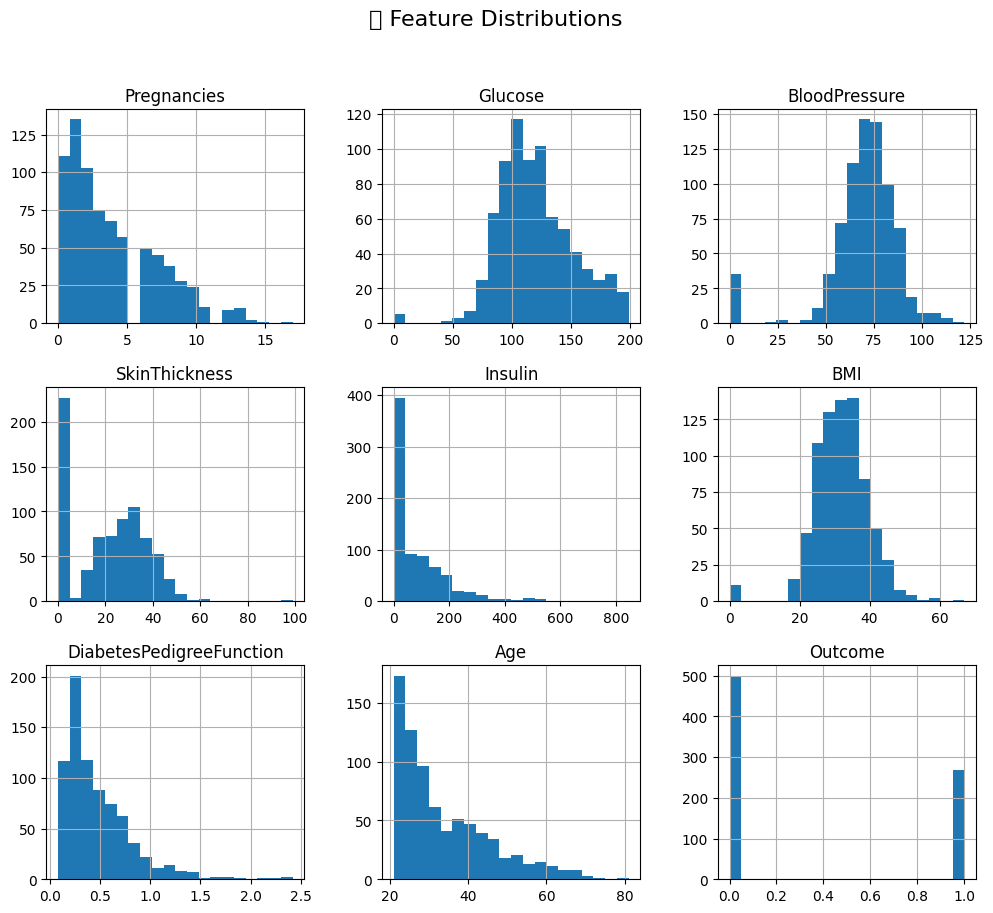

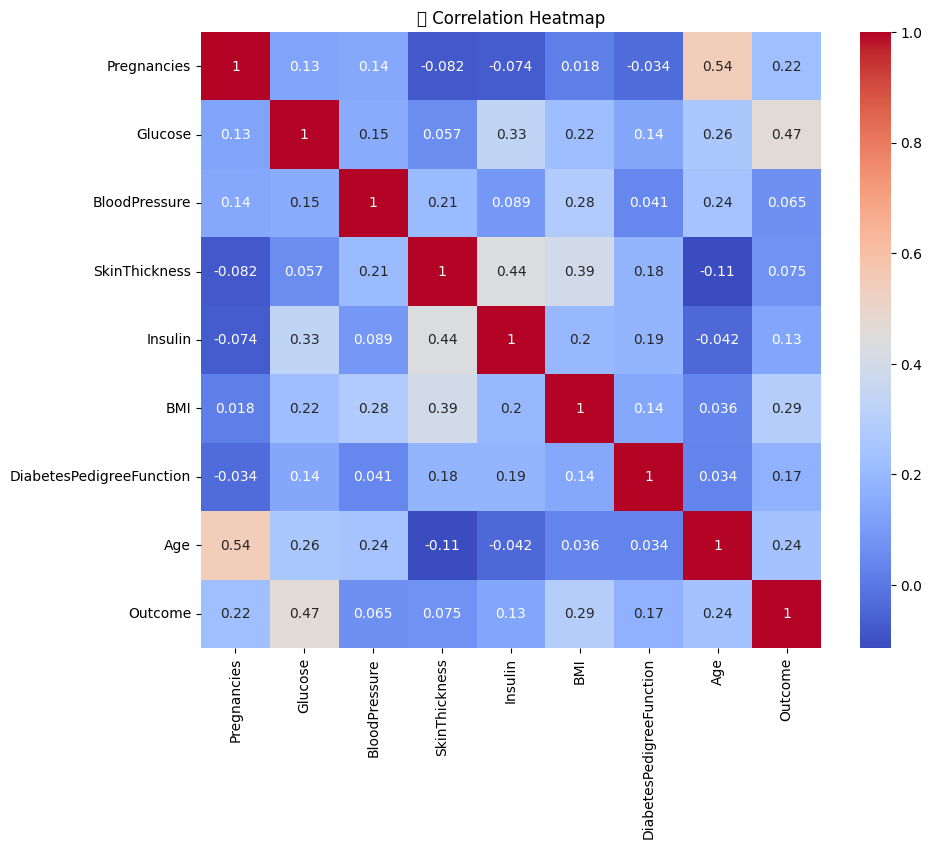


🔹 Z-Score Based Outlier Count Per Feature:
[ 4  5 35  1 18 14 11  5]

🔹 Skewness of Features:
Insulin                     2.27
DiabetesPedigreeFunction    1.92
Age                         1.13
Pregnancies                 0.90
Glucose                     0.17
SkinThickness               0.11
BMI                        -0.43
BloodPressure              -1.84
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv("diabetes.csv")  # Or replace with your actual path

# 1. Check for Missing Values
print("🔹 Missing Values:")
print(df.isnull().sum())

# 2. Check Data Types
print("\n🔹 Data Types:")
print(df.dtypes)

# 3. Basic Descriptive Statistics
print("\n🔹 Descriptive Stats:")
print(df.describe())

# 4. Check for Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔹 Duplicates Found: {duplicates}")
df = df.drop_duplicates()

# 5. Class Balance Visualization
sns.countplot(x='Outcome', data=df)
plt.title("🔹 Class Balance")
plt.show()

# 6. Feature Distributions
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("🔹 Feature Distributions", fontsize=16)
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔹 Correlation Heatmap")
plt.show()

# 8. Z-Score for Outlier Check
z_scores = np.abs(zscore(df.drop('Outcome', axis=1)))
outliers = (z_scores > 3).sum(axis=0)
print("\n🔹 Z-Score Based Outlier Count Per Feature:")
print(outliers)

# 9. Skewness
print("\n🔹 Skewness of Features:")
print(df.drop('Outcome', axis=1).skew().sort_values(ascending=False))


In [ ]:
# Columns where 0 is biologically invalid
cols_with_zero_as_nan = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0s with NaN
df[cols_with_zero_as_nan] = df[cols_with_zero_as_nan].replace(0, np.nan)


In [ ]:
print("Missing values after treating 0s as NaN:")
print(df[cols_with_zero_as_nan].isnull().sum())


Missing values after treating 0s as NaN:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [ ]:
# Median imputation
df[cols_with_zero_as_nan] = df[cols_with_zero_as_nan].fillna(df[cols_with_zero_as_nan].median())


In [ ]:
print("Final missing values after imputation:")
print(df.isnull().sum())


Final missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step 3A: Outlier Detection Using Z-Score Method

In [ ]:
from scipy.stats import zscore

def remove_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    z_scores = np.abs(zscore(df_clean.select_dtypes(include=[np.number])))
    mask = (z_scores < threshold).all(axis=1)
    df_clean = df_clean[mask]
    return df_clean


In [ ]:
df_no_outliers = remove_outliers_zscore(df)
print("Shape after outlier removal:", df_no_outliers.shape)


Shape after outlier removal: (718, 9)


In [ ]:
df_with_outliers = df.copy()           # Cleaned for zeros but keeps outliers
df_without_outliers = df_no_outliers   # Cleaned for zeros AND outliers


 Log1p Transformation Code (Log(1 + x) to handle 0s)

In [ ]:
import numpy as np

skewed_features = ["Insulin", "DiabetesPedigreeFunction", "Age", "Pregnancies"]

for feature in skewed_features:
    # Only apply if feature has positive values
    df_with_outliers[feature] = np.log1p(df_with_outliers[feature])
    df_without_outliers[feature] = np.log1p(df_without_outliers[feature])



In [ ]:
# Re-check skewness after transformation
print("🔍 Skewness after log1p transformation (with outliers):")
print(df_with_outliers[skewed_features].skew())

print("\n🔍 Skewness after log1p transformation (without outliers):")
print(df_without_outliers[skewed_features].skew())


🔍 Skewness after log1p transformation (with outliers):
Insulin                    -0.18
DiabetesPedigreeFunction    1.12
Age                         0.61
Pregnancies                -0.24
dtype: float64

🔍 Skewness after log1p transformation (without outliers):
Insulin                    -0.88
DiabetesPedigreeFunction    0.80
Age                         0.59
Pregnancies                -0.28
dtype: float64


In [ ]:
# If Outcome column was lost during transformations, reattach it
df_with_outliers["Outcome"] = df["Outcome"]
df_without_outliers["Outcome"] = df["Outcome"]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_with_outliers = df_with_outliers.drop("Outcome", axis=1)
y_with_outliers = df_with_outliers["Outcome"]

X_without_outliers = df_without_outliers.drop("Outcome", axis=1)
y_without_outliers = df_without_outliers["Outcome"]

# Scale the features
scaler_with = StandardScaler()
scaler_without = StandardScaler()

X_with_outliers_scaled = scaler_with.fit_transform(X_with_outliers)
X_without_outliers_scaled = scaler_without.fit_transform(X_without_outliers)

print("Shapes:", X_with_outliers_scaled.shape, X_without_outliers_scaled.shape)


Shapes: (768, 8) (718, 8)


Step 6: Train-Test Split (on both datasets)

In [ ]:
from sklearn.model_selection import train_test_split

# Features & Target
X_with = df_with_outliers.drop("Outcome", axis=1)
y_with = df_with_outliers["Outcome"]

X_without = df_without_outliers.drop("Outcome", axis=1)
y_without = df_without_outliers["Outcome"]

# Split both
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with, y_with, test_size=0.2, random_state=42)
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_without, y_without, test_size=0.2, random_state=42)


In [ ]:
# 🔄 Step: Handle Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# SMOTE for 'with outliers' data
smote_with = SMOTE(random_state=42)
X_train_with_smote, y_train_with_smote = smote_with.fit_resample(X_train_with, y_train_with)

# SMOTE for 'without outliers' data
smote_wo = SMOTE(random_state=42)
X_train_wo_smote, y_train_wo_smote = smote_wo.fit_resample(X_train_wo, y_train_wo)

# Check class distribution after SMOTE
print("🔹 Class Distribution After SMOTE (With Outliers):")
print(y_train_with_smote.value_counts())
print("\n🔹 Class Distribution After SMOTE (Without Outliers):")
print(y_train_wo_smote.value_counts())


🔹 Class Distribution After SMOTE (With Outliers):
Outcome
0    401
1    401
Name: count, dtype: int64

🔹 Class Distribution After SMOTE (Without Outliers):
Outcome
1    379
0    379
Name: count, dtype: int64


Step 7: Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler objects
scaler_with = StandardScaler()
scaler_wo = StandardScaler()

# Scale after SMOTE
X_train_with_scaled = scaler_with.fit_transform(X_train_with_smote)
X_test_with_scaled = scaler_with.transform(X_test_with)  # use original test set

X_train_wo_scaled = scaler_wo.fit_transform(X_train_wo_smote)
X_test_wo_scaled = scaler_wo.transform(X_test_wo)        # use original test set


 Step 8: Model Training (Start with Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Train using SMOTE-balanced data
lr = LogisticRegression()
lr.fit(X_train_with_scaled, y_train_with_smote)

# Predict on the original (unchanged) test set
y_pred_with = lr.predict(X_test_with_scaled)

# Evaluation
print("🔹 Logistic Regression (With Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_with, y_pred_with))
print("Confusion Matrix:\n", confusion_matrix(y_test_with, y_pred_with))
print("Classification Report:\n", classification_report(y_test_with, y_pred_with))
print("ROC-AUC Score:", roc_auc_score(y_test_with, lr.predict_proba(X_test_with_scaled)[:, 1]))


🔹 Logistic Regression (With Outliers + SMOTE):
Accuracy: 0.7012987012987013
Confusion Matrix:
 [[68 31]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.56      0.73      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154

ROC-AUC Score: 0.8194674012855832


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Train using SMOTE-balanced data
lr_wo = LogisticRegression()
lr_wo.fit(X_train_wo_scaled, y_train_wo_smote)

# Predict on the original (unchanged) test set
y_pred_wo = lr_wo.predict(X_test_wo_scaled)

# Evaluation
print("🔹 Logistic Regression (Without Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_wo))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_wo))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_wo))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, lr_wo.predict_proba(X_test_wo_scaled)[:, 1]))


🔹 Logistic Regression (Without Outliers + SMOTE):
Accuracy: 0.7708333333333334
Confusion Matrix:
 [[73 24]
 [ 9 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82        97
           1       0.61      0.81      0.70        47

    accuracy                           0.77       144
   macro avg       0.75      0.78      0.76       144
weighted avg       0.80      0.77      0.78       144

ROC-AUC Score: 0.8633472252686993


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Train on SMOTE-balanced data
rf_with = RandomForestClassifier(random_state=42)
rf_with.fit(X_train_with_scaled, y_train_with_smote)

# Predict on the original test set
y_pred_with_rf = rf_with.predict(X_test_with_scaled)

# Evaluation
print("🔹 Random Forest (With Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_with, y_pred_with_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_with, y_pred_with_rf))
print("Classification Report:\n", classification_report(y_test_with, y_pred_with_rf))
print("ROC-AUC Score:", roc_auc_score(y_test_with, rf_with.predict_proba(X_test_with_scaled)[:, 1]))


🔹 Random Forest (With Outliers + SMOTE):
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[76 23]
 [12 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81        99
           1       0.65      0.78      0.71        55

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

ROC-AUC Score: 0.8226813590449954


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Model
rf_wo = RandomForestClassifier(random_state=42)
rf_wo.fit(X_train_wo_scaled, y_train_wo_smote)

# Predict on the original test set
y_pred_wo_rf = rf_wo.predict(X_test_wo_scaled)

# Evaluation
print("\n🔹 Random Forest (Without Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_wo_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_wo_rf))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_wo_rf))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, rf_wo.predict_proba(X_test_wo_scaled)[:, 1]))



🔹 Random Forest (Without Outliers + SMOTE):
Accuracy: 0.7847222222222222
Confusion Matrix:
 [[79 18]
 [13 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84        97
           1       0.65      0.72      0.69        47

    accuracy                           0.78       144
   macro avg       0.76      0.77      0.76       144
weighted avg       0.79      0.78      0.79       144

ROC-AUC Score: 0.857095854354025


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

xgb_with = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_with.fit(X_train_with_scaled, y_train_with_smote)
y_pred_xgb_with = xgb_with.predict(X_test_with_scaled)

print("🔹 XGBoost (With Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_with, y_pred_xgb_with))
print("Confusion Matrix:\n", confusion_matrix(y_test_with, y_pred_xgb_with))
print("Classification Report:\n", classification_report(y_test_with, y_pred_xgb_with))
print("ROC-AUC Score:", roc_auc_score(y_test_with, xgb_with.predict_proba(X_test_with_scaled)[:, 1]))


🔹 XGBoost (With Outliers + SMOTE):
Accuracy: 0.7077922077922078
Confusion Matrix:
 [[70 29]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154

ROC-AUC Score: 0.7849403122130394


In [ ]:
xgb_wo = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_wo.fit(X_train_wo_scaled, y_train_wo_smote)
y_pred_xgb_wo = xgb_wo.predict(X_test_wo_scaled)

print("\n🔹 XGBoost (Without Outliers + SMOTE):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_xgb_wo))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_xgb_wo))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_xgb_wo))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, xgb_wo.predict_proba(X_test_wo_scaled)[:, 1]))



🔹 XGBoost (Without Outliers + SMOTE):
Accuracy: 0.7361111111111112
Confusion Matrix:
 [[76 21]
 [17 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        97
           1       0.59      0.64      0.61        47

    accuracy                           0.74       144
   macro avg       0.70      0.71      0.71       144
weighted avg       0.74      0.74      0.74       144

ROC-AUC Score: 0.8074139065584559


In [ ]:
print(X_train_wo_scaled.shape, y_train_wo.shape)
print(X_test_wo_scaled.shape, y_test_wo.shape)

# Check for NaNs or infinite values
import numpy as np
print("NaNs in X_train:", np.isnan(X_train_wo_scaled).sum())
print("NaNs in X_test:", np.isnan(X_test_wo_scaled).sum())
print("NaNs in y_train:", y_train_wo.isna().sum())
print("NaNs in y_test:", y_test_wo.isna().sum())


(758, 8) (574,)
(144, 8) (144,)
NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0


In [ ]:
!pip install lazypredict


In [ ]:
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings("ignore")

# Initialize LazyClassifier
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate on scaled dataset
models, predictions = lazy_clf.fit(X_train_wo_scaled, X_test_wo_scaled, y_train_wo, y_test_wo)

# Display Top 10 Models
print("🔝 Top Performing Models:")
print(models.head(10))


  0%|          | 0/32 [00:00<?, ?it/s]

🔝 Top Performing Models:
Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


In [ ]:
print(X_train_wo_scaled.shape, y_train_wo.shape)
print(X_test_wo_scaled.shape, y_test_wo.shape)


(758, 8) (574,)
(144, 8) (144,)


In [ ]:
# Correct split again from raw df_without_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_wo = df_without_outliers.drop("Outcome", axis=1)
y_wo = df_without_outliers["Outcome"]

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo, y_wo, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_wo_scaled = scaler.fit_transform(X_train_wo)
X_test_wo_scaled = scaler.transform(X_test_wo)

# Confirm shapes now
print(X_train_wo_scaled.shape, y_train_wo.shape)
print(X_test_wo_scaled.shape, y_test_wo.shape)


(574, 8) (574,)
(144, 8) (144,)


In [ ]:
from lazypredict.Supervised import LazyClassifier

# Instantiate and run
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_clf.fit(X_train_wo_scaled, X_test_wo_scaled, y_train_wo, y_test_wo)

# Show top models
print("🔝 Top Performing Models:")
print(models.head(10))


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 195, number of negative: 379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 574, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339721 -> initscore=-0.664537
[LightGBM] [Info] Start training from score -0.664537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Step: Feature Importance Visualization

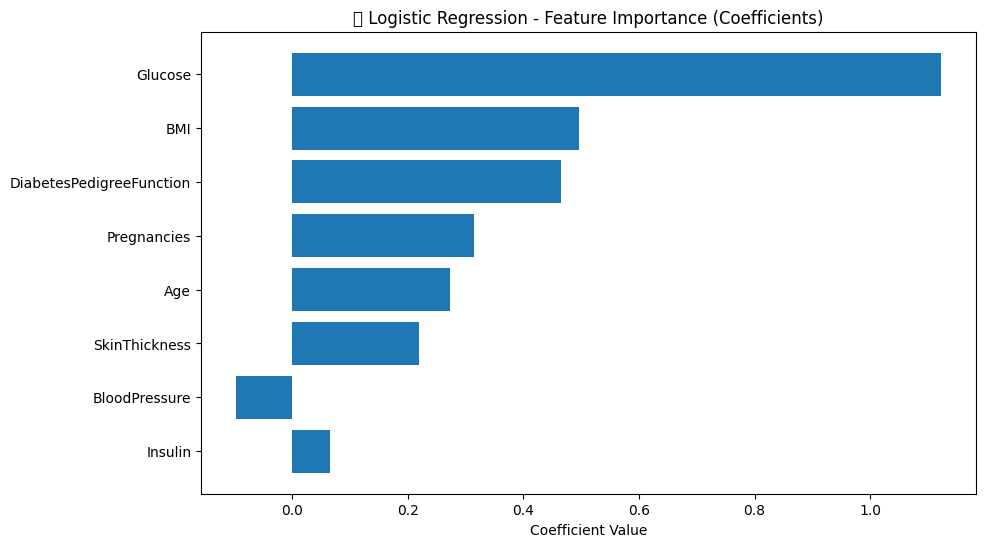

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names
features = X_train_wo.columns
coefficients = lr_wo.coef_[0]

# Create a DataFrame
lr_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
lr_importance = lr_importance.sort_values(by='Importance', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(lr_importance['Feature'], lr_importance['Importance'])
plt.title("🔹 Logistic Regression - Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()


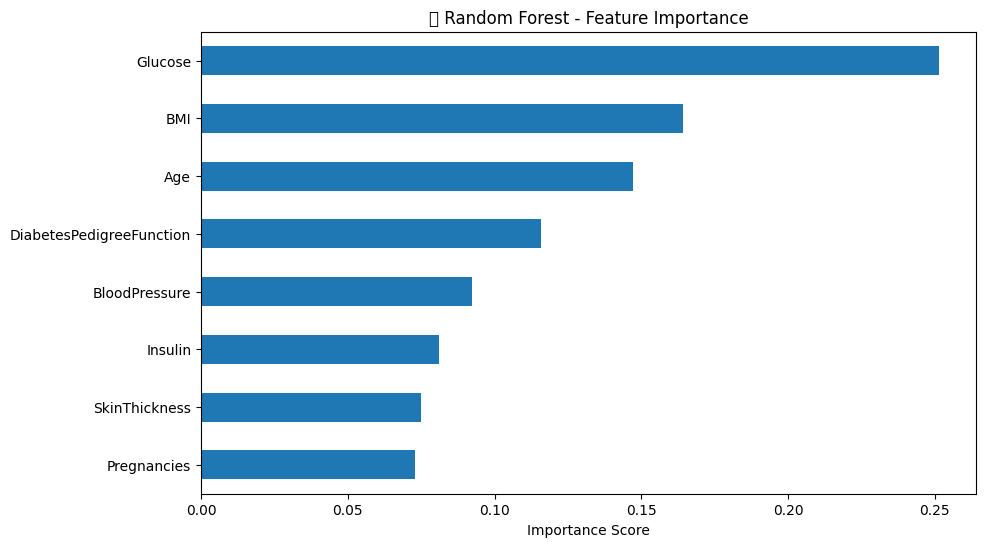

In [ ]:
# Get importances
rf_importance = pd.Series(rf_wo.feature_importances_, index=X_train_wo.columns)
rf_importance = rf_importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10,6))
rf_importance.plot(kind='barh')
plt.title("🔹 Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.show()


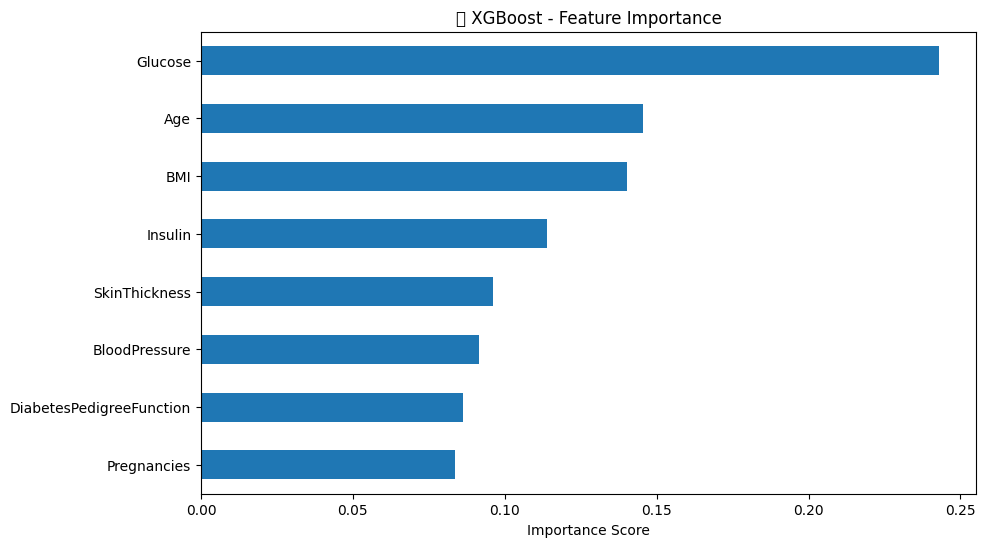

In [ ]:
# Get importances
xgb_importance = pd.Series(xgb_wo.feature_importances_, index=X_train_wo.columns)
xgb_importance = xgb_importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10,6))
xgb_importance.plot(kind='barh')
plt.title("🔹 XGBoost - Feature Importance")
plt.xlabel("Importance Score")
plt.show()


Tune Top Models Using Optuna

In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Step 1: Define Optuna tuning function
def tune_logistic(trial):
    C = trial.suggest_float("C", 0.01, 10.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2"])
    solver = trial.suggest_categorical("solver", ["lbfgs", "liblinear"])

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    return cross_val_score(model, X_train_wo_scaled, y_train_wo, cv=5, scoring="roc_auc").mean()

# Step 2: Run the optimization
study_lr = optuna.create_study(direction="maximize")
study_lr.optimize(tune_logistic, n_trials=20)

# Step 3: Get best parameters and print them
best_lr_params = study_lr.best_params
print("✅ Best Logistic Regression Parameters:", best_lr_params)

# Step 4: Train model using best parameters
lr_best = LogisticRegression(**best_lr_params, max_iter=1000)
lr_best.fit(X_train_wo_scaled, y_train_wo)

# Step 5: Evaluate model
y_pred_lr = lr_best.predict(X_test_wo_scaled)
y_proba_lr = lr_best.predict_proba(X_test_wo_scaled)[:, 1]

print("\n📊 Evaluation on Test Set (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_lr))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_lr))


[I 2025-05-31 16:52:02,618] A new study created in memory with name: no-name-e5293909-87f9-44bf-aa2a-9871f9bb3ede
[I 2025-05-31 16:52:02,666] Trial 0 finished with value: 0.8361241565452092 and parameters: {'C': 7.411233277577975, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.8361241565452092.
[I 2025-05-31 16:52:02,925] Trial 1 finished with value: 0.8343607737291947 and parameters: {'C': 0.011321879285727282, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8361241565452092.
[I 2025-05-31 16:52:03,397] Trial 2 finished with value: 0.8362609086819613 and parameters: {'C': 3.011426495830572, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 2 with value: 0.8362609086819613.
[I 2025-05-31 16:52:03,836] Trial 3 finished with value: 0.8371390013495278 and parameters: {'C': 0.28250835686071185, 'penalty': 'l2', 'solver': 'lbfgs'}. Best is trial 3 with value: 0.8371390013495278.
[I 2025-05-31 16:52:04,103] Trial 4 finished with value: 0.8377507872

✅ Best Logistic Regression Parameters: {'C': 0.1334440530397642, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Evaluation on Test Set (Logistic Regression):
Accuracy: 0.7986111111111112
ROC-AUC Score: 0.8675148058784821
Confusion Matrix:
 [[87 10]
 [19 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.74      0.60      0.66        47

    accuracy                           0.80       144
   macro avg       0.78      0.75      0.76       144
weighted avg       0.79      0.80      0.79       144



In [ ]:
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 🔍 Step 1: Define objective function for Optuna
def tune_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    }
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric="logloss")
    return cross_val_score(model, X_train_wo_scaled, y_train_wo, cv=5, scoring="roc_auc").mean()

# 🔁 Step 2: Run optimization
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(tune_xgb, n_trials=20)

# ✅ Step 3: Best parameters
best_xgb_params = study_xgb.best_params
print("✅ Best XGB Parameters:", best_xgb_params)

# 🎯 Step 4: Train model with best parameters
xgb_best = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric="logloss")
xgb_best.fit(X_train_wo_scaled, y_train_wo)

# 🧪 Step 5: Evaluation
y_pred_xgb = xgb_best.predict(X_test_wo_scaled)
y_proba_xgb = xgb_best.predict_proba(X_test_wo_scaled)[:, 1]

print("\n📊 Evaluation on Test Set (XGBClassifier):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_xgb))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_xgb))


[I 2025-05-31 16:51:02,220] A new study created in memory with name: no-name-d969700d-0c81-4c1c-8647-111181e5c7cb
[I 2025-05-31 16:51:07,603] Trial 0 finished with value: 0.8016797121007647 and parameters: {'n_estimators': 179, 'max_depth': 6, 'learning_rate': 0.24096708038590325, 'subsample': 0.9980835371149396}. Best is trial 0 with value: 0.8016797121007647.
[I 2025-05-31 16:51:07,816] Trial 1 finished with value: 0.8150391363022942 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.21378912455204205, 'subsample': 0.6772027466722321}. Best is trial 1 with value: 0.8150391363022942.
[I 2025-05-31 16:51:08,139] Trial 2 finished with value: 0.8163409806567703 and parameters: {'n_estimators': 77, 'max_depth': 7, 'learning_rate': 0.12165912576774641, 'subsample': 0.7423740053647008}. Best is trial 2 with value: 0.8163409806567703.
[I 2025-05-31 16:51:08,407] Trial 3 finished with value: 0.813527665317139 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning

✅ Best XGB Parameters: {'n_estimators': 81, 'max_depth': 3, 'learning_rate': 0.08839477525945769, 'subsample': 0.9883555032424941}

📊 Evaluation on Test Set (XGBClassifier):
Accuracy: 0.8055555555555556
ROC-AUC Score: 0.8620311471813994
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.73      0.64      0.68        47

    accuracy                           0.81       144
   macro avg       0.78      0.76      0.77       144
weighted avg       0.80      0.81      0.80       144



In [ ]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# 📌 Objective function to optimize var_smoothing
def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-12, 1e-6)
    model = GaussianNB(var_smoothing=var_smoothing)

    # 5-fold CV on training set
    score = cross_val_score(model, X_train_wo_scaled, y_train_wo,
                            scoring='roc_auc', cv=5).mean()
    return score

# 🔁 Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 📌 Best parameters and score
print("✅ Best Parameters:", study.best_params)
print("🔝 Best ROC-AUC Score:", study.best_value)

# 🎯 Train with best params
best_gnb = GaussianNB(var_smoothing=study.best_params['var_smoothing'])
best_gnb.fit(X_train_wo_scaled, y_train_wo)

# 🧪 Predict and Evaluate
y_pred_gnb = best_gnb.predict(X_test_wo_scaled)
y_proba_gnb = best_gnb.predict_proba(X_test_wo_scaled)[:, 1]

print("\n📊 Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_gnb))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_gnb))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_gnb))


[I 2025-05-31 16:50:12,756] A new study created in memory with name: no-name-b9b6ec41-9ccd-4271-95dc-1a58fb704ea2
[I 2025-05-31 16:50:12,833] Trial 0 finished with value: 0.8363535762483132 and parameters: {'var_smoothing': 2.634962028799826e-07}. Best is trial 0 with value: 0.8363535762483132.
[I 2025-05-31 16:50:12,889] Trial 1 finished with value: 0.8363535762483132 and parameters: {'var_smoothing': 3.101738759695092e-11}. Best is trial 0 with value: 0.8363535762483132.
[I 2025-05-31 16:50:12,984] Trial 2 finished with value: 0.8363535762483132 and parameters: {'var_smoothing': 1.7796517593319672e-09}. Best is trial 0 with value: 0.8363535762483132.
[I 2025-05-31 16:50:13,045] Trial 3 finished with value: 0.8363535762483132 and parameters: {'var_smoothing': 8.571082019695347e-09}. Best is trial 0 with value: 0.8363535762483132.
[I 2025-05-31 16:50:13,096] Trial 4 finished with value: 0.8363535762483132 and parameters: {'var_smoothing': 1.1303732230407155e-09}. Best is trial 0 with v

✅ Best Parameters: {'var_smoothing': 2.634962028799826e-07}
🔝 Best ROC-AUC Score: 0.8363535762483132

📊 Evaluation on Test Set:
Accuracy: 0.7847222222222222
ROC-AUC Score: 0.8609344154419829
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        97
           1       0.64      0.77      0.70        47

    accuracy                           0.78       144
   macro avg       0.76      0.78      0.77       144
weighted avg       0.80      0.78      0.79       144



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Best estimators
estimators = [
    ('lr', LogisticRegression(C=0.1334, penalty='l2', solver='liblinear')),
    ('xgb', XGBClassifier(**best_xgb, use_label_encoder=False, eval_metric='logloss')),
    ('gnb', GaussianNB(var_smoothing=2.634962028799826e-07))
]

# Meta learner
final_estimator = LogisticRegression()

# Create StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# Fit model
stacking_clf.fit(X_train_wo_scaled, y_train_wo)

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

y_pred_stack = stacking_clf.predict(X_test_wo_scaled)
y_proba_stack = stacking_clf.predict_proba(X_test_wo_scaled)[:, 1]

print("\n📊 Stacking Ensemble Evaluation:")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_stack))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_stack))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_stack))



📊 Stacking Ensemble Evaluation:
Accuracy: 0.7916666666666666
ROC-AUC Score: 0.8740951963149813
Confusion Matrix:
 [[86 11]
 [19 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        97
           1       0.72      0.60      0.65        47

    accuracy                           0.79       144
   macro avg       0.77      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144



In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(stacking_clf, X_train_wo_scaled, y_train_wo, cv=5, scoring='roc_auc')
print("✅ Mean ROC-AUC:", cv_scores.mean())
print("📉 Standard Deviation:", cv_scores.std())


✅ Mean ROC-AUC: 0.8383598740440845
📉 Standard Deviation: 0.05521435782372621


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_clf, X_train_wo_scaled, y_train_wo, cv=skf, scoring='roc_auc')
print("Stratified ROC-AUC Mean:", cv_scores.mean())
print("Stratified ROC-AUC Std Dev:", cv_scores.std())


Stratified ROC-AUC Mean: 0.8349986504723347
Stratified ROC-AUC Std Dev: 0.026452533195585513


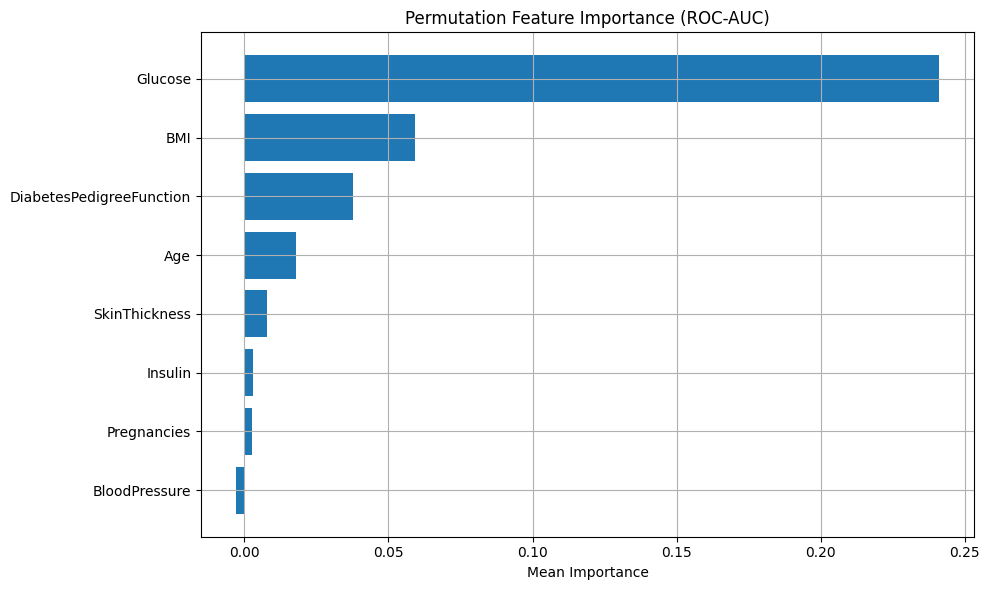

In [ ]:
from sklearn.inspection import permutation_importance

# Fit your best model again
stacking_clf.fit(X_train_wo, y_train_wo)

# Permutation Importance on Test Set
result = permutation_importance(stacking_clf, X_test_wo, y_test_wo, n_repeats=10, random_state=42, scoring='roc_auc')

# Plot
import matplotlib.pyplot as plt

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_test_wo.columns)[sorted_idx])
plt.title("Permutation Feature Importance (ROC-AUC)")
plt.xlabel("Mean Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


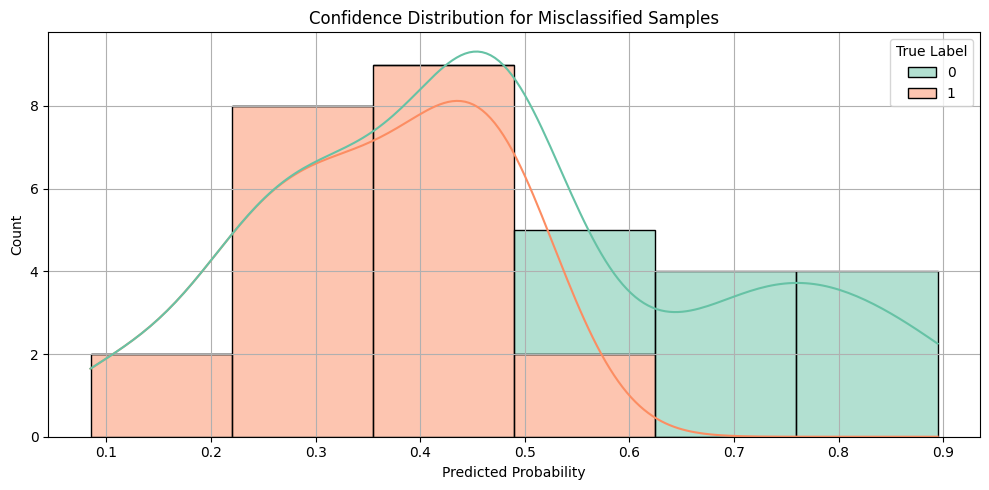

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities and labels
y_probs = stacking_clf.predict_proba(X_test_wo)[:, 1]
y_preds = stacking_clf.predict(X_test_wo)

# Create a DataFrame for debugging
df_debug = pd.DataFrame({
    "True Label": y_test_wo,
    "Predicted Label": y_preds,
    "Prediction Confidence": y_probs
})

# Filter misclassified samples
misclassified = df_debug[df_debug["True Label"] != df_debug["Predicted Label"]]

# Visualize misclassified samples' confidence
plt.figure(figsize=(10, 5))
sns.histplot(data=misclassified, x="Prediction Confidence", hue="True Label", multiple="stack", kde=True, palette="Set2")
plt.title("Confidence Distribution for Misclassified Samples")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test_wo, y_proba_xgb)

# 2. Find optimal index where TPR - FPR is maximum
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"✅ Optimal Threshold: {optimal_threshold:.2f}")

# 3. Apply the optimal threshold
y_pred_opt = (y_proba_xgb >= optimal_threshold).astype(int)

# 4. Evaluate
print("\n📊 Evaluation with Optimized Threshold:")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_opt))
print("ROC-AUC:", roc_auc_score(y_test_wo, y_proba_xgb))  # same as before
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_opt))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_opt))


✅ Optimal Threshold: 0.32

📊 Evaluation with Optimized Threshold:
Accuracy: 0.7777777777777778
ROC-AUC: 0.8620311471813994
Confusion Matrix:
 [[71 26]
 [ 6 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.82        97
           1       0.61      0.87      0.72        47

    accuracy                           0.78       144
   macro avg       0.77      0.80      0.77       144
weighted avg       0.82      0.78      0.78       144



In [ ]:
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Get predicted probabilities from stacking ensemble
y_proba_stack = stacking_clf.predict_proba(X_test_wo_scaled)[:, 1]

# Find optimal threshold
fpr, tpr, thresholds = roc_curve(y_test_wo, y_proba_stack)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for Stacking: {optimal_threshold:.2f}")

# Apply threshold to get predicted labels
y_pred_stack_opt = (y_proba_stack >= optimal_threshold).astype(int)

# Evaluate the optimized ensemble predictions
print("\n📊 Evaluation with Optimized Threshold (Stacking):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_stack_opt))
print("ROC-AUC:", roc_auc_score(y_test_wo, y_proba_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_stack_opt))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_stack_opt))


Optimal Threshold for Stacking: 0.27

📊 Evaluation with Optimized Threshold (Stacking):
Accuracy: 0.5902777777777778
ROC-AUC: 0.5101996051765738
Confusion Matrix:
 [[62 35]
 [24 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68        97
           1       0.40      0.49      0.44        47

    accuracy                           0.59       144
   macro avg       0.56      0.56      0.56       144
weighted avg       0.62      0.59      0.60       144



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Define base models with tuned parameters
log_reg = LogisticRegression(C=0.1334, penalty='l2', solver='liblinear')
xgb_clf = XGBClassifier(**best_xgb, use_label_encoder=False, eval_metric='logloss')
gnb_clf = GaussianNB(var_smoothing=2.634962028799826e-07)

# Create soft voting ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('xgb', xgb_clf), ('gnb', gnb_clf)],
    voting='soft',  # Use 'hard' for majority vote
    n_jobs=-1
)

# Fit the model
voting_clf.fit(X_train_wo_scaled, y_train_wo)

# Predict
y_pred_vote = voting_clf.predict(X_test_wo_scaled)
y_proba_vote = voting_clf.predict_proba(X_test_wo_scaled)[:, 1]

# Evaluate
print("\n📊 Voting Ensemble Evaluation:")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_vote))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_vote))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_vote))



📊 Voting Ensemble Evaluation:
Accuracy: 0.7916666666666666
ROC-AUC Score: 0.8747532353586313
Confusion Matrix:
 [[82 15]
 [15 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.68      0.68      0.68        47

    accuracy                           0.79       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.79      0.79      0.79       144



In [ ]:
from sklearn.metrics import roc_curve

# Step 1: Get predicted probabilities
y_proba_voting = voting_clf.predict_proba(X_test_wo_scaled)[:, 1]

# Step 2: Find optimal threshold
fpr, tpr, thresholds = roc_curve(y_test_wo, y_proba_voting)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Step 3: Recalculate predictions with the new threshold
y_pred_voting_opt = (y_proba_voting >= optimal_threshold).astype(int)

# Step 4: Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("\n📊 Evaluation with Optimized Threshold (Voting Ensemble):")
print("Accuracy:", accuracy_score(y_test_wo, y_pred_voting_opt))
print("ROC-AUC Score:", roc_auc_score(y_test_wo, y_proba_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test_wo, y_pred_voting_opt))
print("Classification Report:\n", classification_report(y_test_wo, y_pred_voting_opt))


Optimal Threshold: 0.29

📊 Evaluation with Optimized Threshold (Voting Ensemble):
Accuracy: 0.7847222222222222
ROC-AUC Score: 0.8747532353586313
Confusion Matrix:
 [[68 29]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81        97
           1       0.61      0.96      0.74        47

    accuracy                           0.78       144
   macro avg       0.79      0.83      0.78       144
weighted avg       0.85      0.78      0.79       144



In [ ]:
import joblib
joblib.dump(voting_clf, "voting_ensemble_final.pkl")


['voting_ensemble_final.pkl']

In [ ]:
import joblib

# Save the VotingClassifier
joblib.dump(voting_clf, 'voting_model.pkl')

# Save the scaler used during preprocessing (like StandardScaler or MinMaxScaler)
joblib.dump(scaler_wo, 'scaler.pkl')


['scaler.pkl']